# 🚢 Titanic ML From Disaster - Kaggle Competition Dataset
#### 📊 Predicting Survival on the Titanic
Author: [Martin Tomov](https://martintomov.com) - @martintmv <br> Dataset: [Kaggle Titanic](https://www.kaggle.com/c/titanic)

The Titanic dataset is a historical dataset that includes information about the passengers who were aboard the Titanic, which tragically sank after colliding with an iceberg in 1912. <br> My task is to predict which passengers survived based on features like their <u>age, sex, passenger class, and more</u>.

#### ❓ Why the Titanic Dataset is Suitable for ANNs?

1️⃣. <b>Binary Classification Problem:</b> <br>The objective is straightforward—predicting whether a passenger survived or not, which is a binary outcome. This aligns well with the capabilities of ANNs for classification tasks.

2️⃣. <b>Structured Data:</b> <br> The dataset consists of tabular data, which is ideal for ANNs. Each row represents a passenger, and the columns represent features that can be used for predictions.

3️⃣. <b>Feature Engineering Opportunity:</b> <br> The dataset allows for feature engineering, so I can create new features from the existing ones, such as deriving titles from names, which could provide additional predictions.

4️⃣. <b>Preprocessing Requirements:</b> <br> Working with the Titanic dataset involves handling missing values and categorical data, offering a good learning opportunity for data preprocessing.

# Step 1: Importing Libraries
First, I need to import all necessary libraries.

In [1]:
# Import libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sn
# ---------------------------
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
# ---------------------------
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, r2_score, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# ---------------------------

# Step 2: Load and Explore the Dataset
Loading the Titanic dataset. <br>
I downloaded it from Kaggle via their API and stored it in a folder called `data`. Next, I will explore the dataset to understand its structure and the type of data it contains.

In [2]:
# Load the dataset
# ---------------------------
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
# Explore the first 10 rows of train.csv
# ---------------------------
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Explore the first 10 rows of test.csv
# ---------------------------
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Get more info on the train dataset
# ---------------------------
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Step 3: Handle Missing Values and Data Preprocessing
Data preprocessing involves cleaning and preparing the data for the model. This includes handling missing values and visualising them, encoding categorical variables, and splitting the data into training and testing sets. <br> <b>The dataset is already split into training and testing set "out of the box", so I will focus on preprocessing it.</b>

In [6]:
# Displaying missing values in train and test datasets
# ---------------------------
def display_missing_values(train_df, test_df):
    print("Train dataset:")
    print(train_df.isnull().sum().sort_values(ascending=False))
    print("\nTest dataset:")
    print(test_df.isnull().sum().sort_values(ascending=False))

display_missing_values(df_train, df_test)

Train dataset:
Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Test dataset:
Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


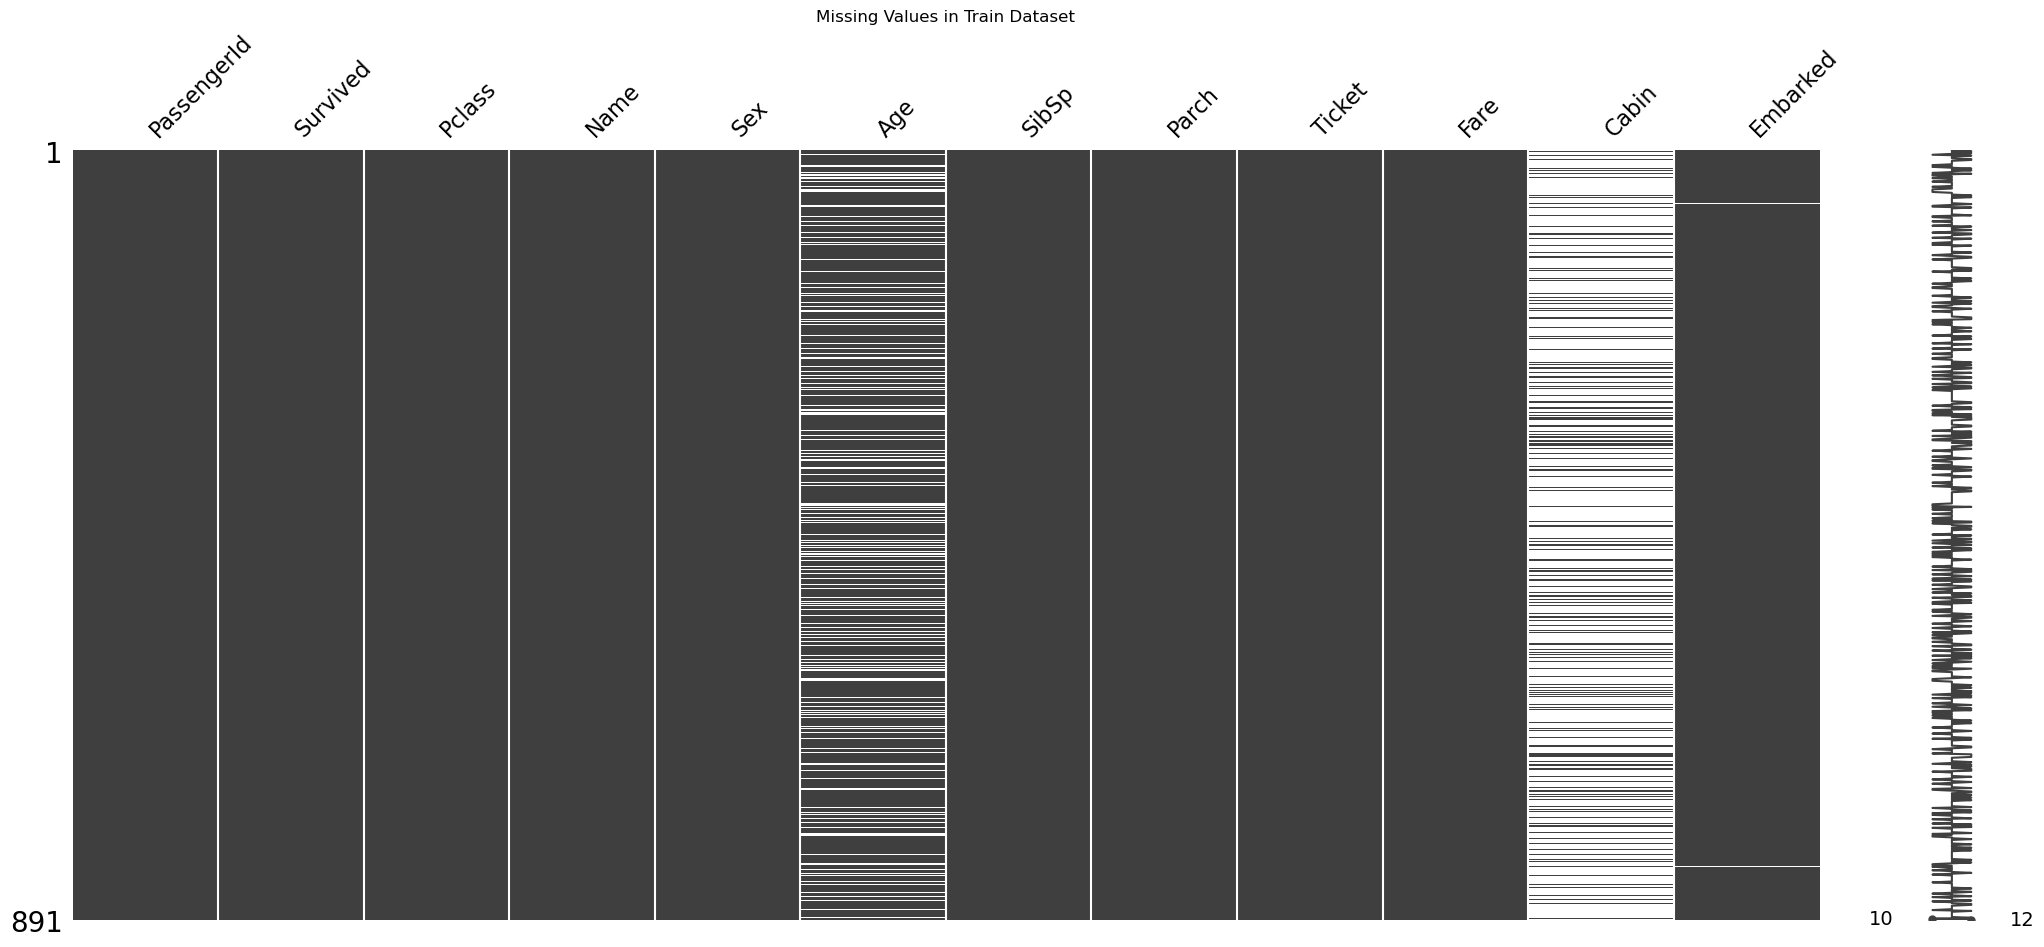

In [7]:
# Matrix visualization of missing values in the train dataset using the missingno library
# ---------------------------
def plot_missing_values(df):
    msno.matrix(df)
    plt.title('Missing Values in Train Dataset')
    plt.show()

plot_missing_values(df_train)
df_train.columns # checking if the columns match the matrix visualization
df = df_train.copy() # making a copy of the dataset, so dropping a column will affect only the copy, not the original dataset

# Step 4: Removing unnecessary (missing) columns - Cabin

In [8]:
# Remove Cabin column from the train and test datasets
# ---------------------------
df.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

# Step 5: Imputing Missing Data and Encoding Categorical Variables
Starting by identifying columns with missing data in my dataset to determine which columns require replacement. <br> Then, I will fill the missing data and encode the categorical variables.

In [9]:
# Identify columns with missing data
# ---------------------------
categorical_cols = ['Embarked']
numeric_cols = ['Age']
bool_cols = []
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
print("Columns with missing data:", missing_data_cols)

Columns with missing data: ['Age', 'Embarked']


### 5.1 Filling missing values in Categorical columns

For <b>categorical columns</b>, I fill missing values with the most common category. 

Both `categorical_columns` and `continuous_columns` functions impute missing values in a specified categorical column of a DataFrame using a RandomForestClassifier, and returns the DataFrame with the imputed column.

In [10]:
# Impute missing values in categorical columns
# ---------------------------

# Splitting df into two parts based on missing values in the passed column
def categorical_columns(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

# Preparing features (X) and target (y) for imputation
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

# Identifing other columns with missing values    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

# Encode categorical features
    label_encoder = LabelEncoder()
    for col in X.select_dtypes(include=['object', 'category']):
        X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

# Impute missing values in other columns using IterativeImputer with RandomForestRegressor        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            X[col] = iterative_imputer.fit_transform(col_with_missing_values)[:, 0]
    
# Split data into train and test set    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to predict missing values
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)
    acc_score = accuracy_score(y_test, rf_classifier.predict(X_test))

# Print the accuracy of imputation for the passed column
    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

# Impute missing values in the passed column for rows with missing values
    X = df_null.drop(passed_col, axis=1)
    for col in X.select_dtypes(include=['object', 'category']):
        X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            X[col] = iterative_imputer.fit_transform(col_with_missing_values)[:, 0]
    
# If there are rows with missing values, predict and impute the missing values for the passed column    
    if not df_null.empty:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
            
# Join the imputed data with the original data and return the imputed column            
    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


### 5.2 Filling missing values in Continuous columns

For <b>numerical columns</b>, I use the median or mean.

In [11]:
# Impute missing values in continuous columns
# ---------------------------

# Splitting df into two parts based on missing values in the passed column
def continuous_columns(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

# Preparing features (X) and target (y) for imputation
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
# Identifing other columns with missing values    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
# Encode categorical features
    label_encoder = LabelEncoder()

    for col in X.select_dtypes(include=['object', 'category']):
        X[col] = label_encoder.fit_transform(X[col])
    
# Impute missing values in other columns using IterativeImputer with RandomForestRegressor
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            X[col] = iterative_imputer.fit_transform(col_with_missing_values)[:, 0]
    
# Split data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor to predict missing values
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

# Print the accuracy of imputation for the passed column
    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

# Impute missing values in the passed column for rows with missing values
    X = df_null.drop(passed_col, axis=1)

    for col in X.select_dtypes(include=['object', 'category']):
        X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            X[col] = iterative_imputer.fit_transform(col_with_missing_values)[:, 0]
                
# If there are rows with missing values, predict and impute the missing values for the passed column                
    if not df_null.empty:
        df_null[passed_col] = rf_regressor.predict(X)
    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

### 5.3 Imputation Summary and Results

First, we iterate over each column in `missing_data_cols`, which contains the names of columns with missing data. For each column, I calculate the percentage of missing values and print it. 

Next, I check if the column is categorical or numeric (based on whether it's in `categorical_cols` or `numeric_cols`). Depending on the type, we call the appropriate function (`categorical_columns` or `continuous_columns`) to impute the missing values. 

Finally, I calculate the percentage of missing values for the entire DataFrame again, filter out the columns with no missing values, and sort the remaining columns in descending order of their missing percentages.

In [12]:
# Process missing data: calculate percentages, impute values, and print.
# ---------------------------
for col in missing_data_cols:
    # Calculate the percentage of missing values in the current column
    missing_percentage = (df[col].isnull().sum() / len(df)) * 100
    print(f"Missing Values {col}: {missing_percentage:.2f}%")
    if col in categorical_cols:
        df[col] = categorical_columns(col)
    elif col in numeric_cols:
        df[col] = continuous_columns(col)

# Calculate and sort missing values percentages for the entire DataFrame
df_missing_percentage = (df.isnull().sum() / len(df)) * 100
df_missing_percentage = df_missing_percentage[df_missing_percentage > 0].sort_values(ascending=False)

Missing Values Age: 19.87%
MAE = 9.333653146853148 

RMSE = 11.618185890467347 

R2 = 0.27195693042609725 

Missing Values Embarked: 0.22%
The feature 'Embarked' has been imputed with 91.01 accuracy



/var/folders/bn/xzwp15h96jg7vf7qxvsqkry80000gn/T/ipykernel_36303/22101444.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[passed_col] = rf_regressor.predict(X)
/var/folders/bn/xzwp15h96jg7vf7qxvsqkry80000gn/T/ipykernel_36303/3468380189.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[passed_col] = rf_classifier.predict(X)


### 5.4 Plot the missing values

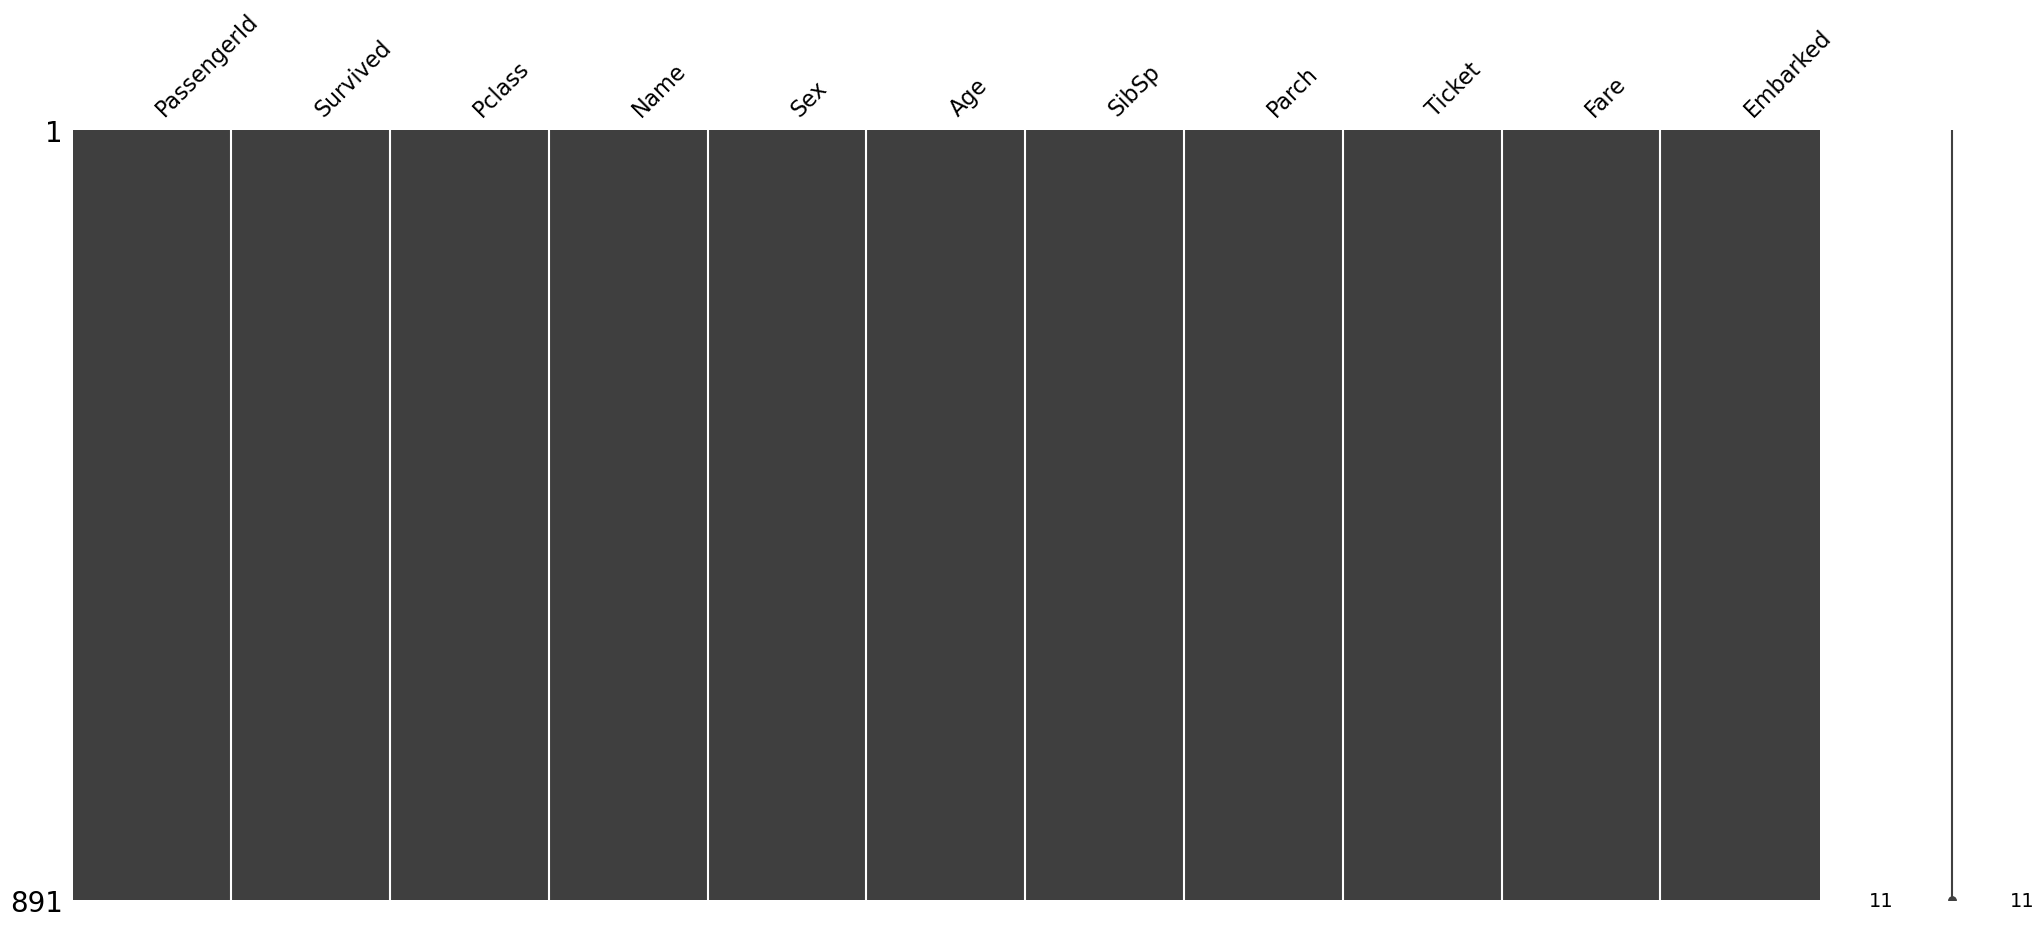

In [13]:
# plotting
# ---------------------------
msno.matrix(df)
plt.show()

#### ✅ Result: Missing values have been removed and the data seems good to go.

# Step 6: Splitting the data and training the model


In [14]:
# Data split into X and Y
# ---------------------------
X = df.drop(['Survived', 'Name'], axis=1)
y = df['Survived']

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object', 'category']):
    X[col] = label_encoder.fit_transform(X[col])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
331,332,1,1,45.500,0,0,20,28.5000,2
733,734,2,1,23.000,0,0,228,13.0000,2
382,383,3,1,32.000,0,0,665,7.9250,2
704,705,3,1,26.000,1,0,398,7.8542,2
813,814,3,0,6.000,4,2,333,31.2750,2
118,119,1,1,24.000,0,1,585,247.5208,0
536,537,1,1,45.000,0,0,21,26.5500,2
361,362,2,1,29.000,1,0,633,27.7208,0
29,30,3,1,31.275,0,0,362,7.8958,2
55,56,1,1,36.870,0,0,94,35.5000,2


# Step 7: Create a Neural Network w/ TensorFlow for Binary Classification

Building, training, and evaluating a binary classification model using TensorFlow's Keras.

First, I define the model architecture as a `Sequential` model with an input layer of 10 neurons with ReLU activation function and an output layer with a sigmoid activation function.

Next, I define an `EarlyStopping` callback with a patience of 15 epochs, which will stop training if the model's performance doesn't improve for 15 consecutive epochs.

I then compile the model with the Adam optimizer, binary cross-entropy loss function, and accuracy as the metric. The model is trained on `X_train` and `y_train` for 100 epochs with a batch size of 16, and the validation data is `X_test` and `y_test`.

Finally, I plot the training and validation loss and accuracy over the epochs to visualize the model's performance.

Epoch 1/100
45/45 [==============================] - 0s 3ms/step - loss: 37.9506 - accuracy: 0.6587 - val_loss: 26.9973 - val_accuracy: 0.6983
Epoch 2/100
45/45 [==============================] - 0s 802us/step - loss: 25.3017 - accuracy: 0.6404 - val_loss: 19.2876 - val_accuracy: 0.6816
Epoch 3/100
45/45 [==============================] - 0s 759us/step - loss: 18.5044 - accuracy: 0.6404 - val_loss: 11.2626 - val_accuracy: 0.6592
Epoch 4/100
45/45 [==============================] - 0s 770us/step - loss: 9.0945 - accuracy: 0.6320 - val_loss: 3.3963 - val_accuracy: 0.7207
Epoch 5/100
45/45 [==============================] - 0s 764us/step - loss: 4.1538 - accuracy: 0.6587 - val_loss: 2.4558 - val_accuracy: 0.6983
Epoch 6/100
45/45 [==============================] - 0s 777us/step - loss: 3.2608 - accuracy: 0.6601 - val_loss: 2.0719 - val_accuracy: 0.7207
Epoch 7/100
45/45 [==============================] - 0s 779us/step - loss: 2.7497 - accuracy: 0.6742 - val_loss: 1.8710 - val_accuracy: 0.

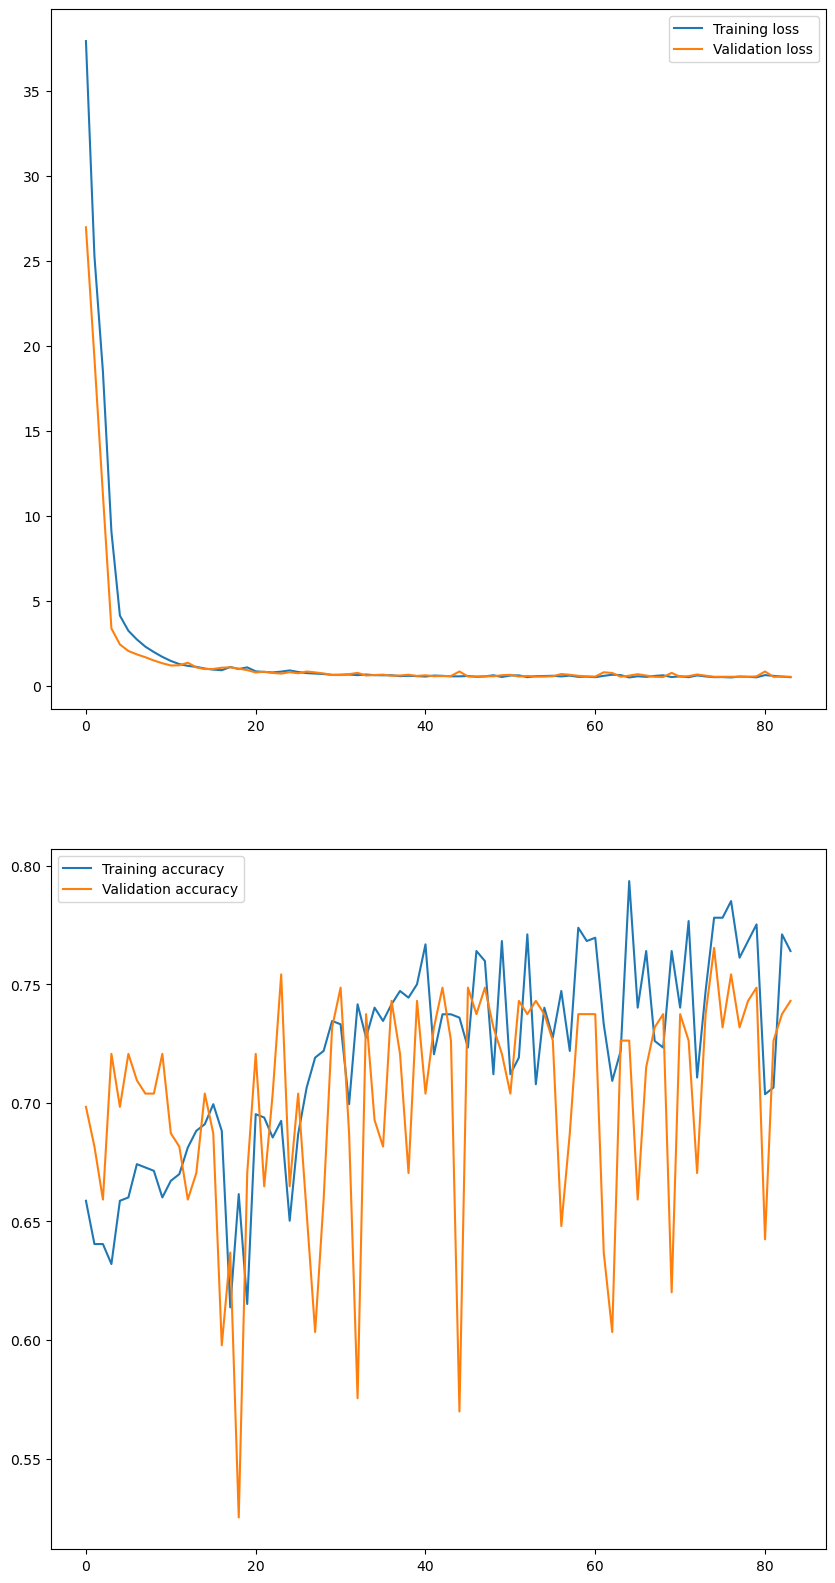

In [16]:
# Build the model architecture
# ---------------------------
model = tf.keras.models.Sequential([
    # input layer with ReLU activation function
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    # output layer with Sigmoid activation function
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define early stopping callback
early_stopping = EarlyStopping(patience=15)

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training and validation metrics
fig, axes = plt.subplots(2, 1, figsize=(10, 20))

axes[0].plot(history.history['loss'], label='Training loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Training accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].legend()

plt.show()

# Step 8: Confusion Matrix

Creating and visualizing a confusion matrix for our trained model's predictions.

First, I use the model to predict the test data `X_test` and convert the output probabilities to binary predictions (`True` if the probability is greater than 0.5, `False` otherwise).

Next, I create a confusion matrix `cm` using the true labels `y_test` and the predicted labels `y_pred`.

Finally, I plot the confusion matrix as a heatmap using seaborn's `heatmap` function, with the actual numbers annotated on the plot.

6/6 [==============================] - 0s 3ms/step


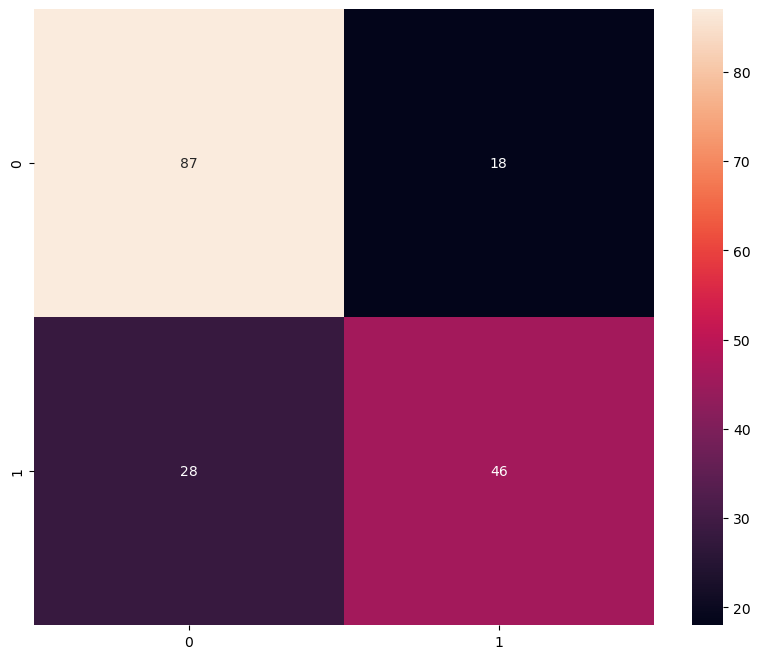

In [17]:
# Create a confusion matrix for the model
# ---------------------------
y_pred = (model.predict(X_test) > 0.5)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

# 🔍 Observations and Conclusions

I found that setting the number of neurons in the input layer equal to the number of features provided a more accurate model. 

Because of the dataset's small size, the exclusion of hidden layers did not reduce performance. Typically, hidden layers can capture complex relationships in the data, but they may also lead to overfitting, especially with limited data.

### 📈 The first <b>baseline model</b> results and confusion matrix provide a mixed perspective:

- The first run of the baseline model achieved a training accuracy of `77.3%` and a validation accuracy of `75.3%`.

- The model is great at predicting non-survivors, with `102 true negatives` and only `3 false negatives`.

- The challenge lays in distinguishing survivors, with an equal number of false positives and true positives at 37. This result indicates a need for further model tuning, possibly by exploring additional hyperparameters or by implementing more sophisticated preprocessing.

### 📈 The second <b>baseline model</b> results and confusion matrix provide a more balanced perspective:

- The second run of the baseline model with reduced `batch size from 32 to 16`, achieved a training accuracy of `76.4%` and a validation accuracy of `74.3%`, with a more balanced classification of true positives and true negatives than before. 

- The loss curves converged well, suggesting there is no overfitting.

- The showing of false positives and false negatives indicates potential areas for improvement, possibly through further tuning or feature work.

- The confusion matrix shows `87 true negatives` and `46 true positives`, with a relatively high number of `false negatives (28)` and `false positives (18)`. This shows the model has become more balanced in its predictions between the classes compared to the previous iteration, with improved recognition of true positives.

### 📈 Comparing the <b>baseline model</b> with a <b>hidden layer, dropout, and class weighting</b> alternative model.

- In an adjusted model with a hidden layer, dropout, and class weighting, the accuracy decreased to `60%`. The confusion matrix showed an increase in true positives for survivors but also an increase in false negatives, suggesting a trade-off between sensitivity and specificity.

- The overall decrease in accuracy indicates that the model may have become too biased towards the minority class.

> #### ✅ Overall, the results suggest that the model is reasonably well balanced, methodical approach to hyperparameter tuning is really important and can lead to significant improvements in the model's performance, the process is really trial and error and requires a lot of patience and understanding of the data.

### 🚀 Knowledge and skills I acquired or reinforced
- Analytical Thinking
- Data Preprocessing
- Feature Engineering
- Model Building
- Model Evaluation
- Hyperparameter Tuning

### 🔗 Sources:
- https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html
- https://www.analyticsvidhya.com/blog/2023/12/sklearn-impute-for-effective-missing-data-handling-in-machine-learning/
- https://www.tensorflow.org/guide/keras/sequential_model
- https://keras.io/guides/sequential_model/
- https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/